In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('./Braille Dataset/Braille Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Braille Dataset/Braille Dataset\a1.JPG0dim.jpg
./Braille Dataset/Braille Dataset\a1.JPG0rot.jpg
./Braille Dataset/Braille Dataset\a1.JPG0whs.jpg
./Braille Dataset/Braille Dataset\a1.JPG10dim.jpg
./Braille Dataset/Braille Dataset\a1.JPG10rot.jpg
./Braille Dataset/Braille Dataset\a1.JPG10whs.jpg
./Braille Dataset/Braille Dataset\a1.JPG11dim.jpg
./Braille Dataset/Braille Dataset\a1.JPG11rot.jpg
./Braille Dataset/Braille Dataset\a1.JPG11whs.jpg
./Braille Dataset/Braille Dataset\a1.JPG12dim.jpg
./Braille Dataset/Braille Dataset\a1.JPG12rot.jpg
./Braille Dataset/Braille Dataset\a1.JPG12whs.jpg
./Braille Dataset/Braille Dataset\a1.JPG13dim.jpg
./Braille Dataset/Braille Dataset\a1.JPG13rot.jpg
./Braille Dataset/Braille Dataset\a1.JPG13whs.jpg
./Braille Dataset/Braille Dataset\a1.JPG14dim.jpg
./Braille Dataset/Braille Dataset\a1.JPG14rot.jpg
./Braille Dataset/Braille Dataset\a1.JPG14whs.jpg
./Braille Dataset/Braille Dataset\a1.JPG15dim.jpg
./Braille Dataset/Braille Dataset\a1.JPG15rot.jpg
./B

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import PIL
import cv2


In [3]:
image_dir = Path('./Braille Dataset/Braille Dataset')

In [4]:
dir_list = list(image_dir.glob('*.jpg'))

In [5]:
image_count = len(dir_list)
image_count

1560

In [6]:
name_list = []
for i in dir_list:
    name_list.append(os.path.basename(i)[0])

In [9]:
images = []
for dir in dir_list:
    I = cv2.imread(str(dir))
    images.append(I)

In [10]:
images_list = np.array(images)
name_list = np.array(name_list).T

In [11]:
le = LabelEncoder()
name_list = le.fit_transform(name_list)

images_list = images_list / 255.0 
print(images_list[0])

[[[0.76078431 0.76078431 0.76078431]
  [0.8        0.8        0.8       ]
  [0.80784314 0.80784314 0.80784314]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 [[0.75686275 0.75686275 0.75686275]
  [0.69411765 0.69411765 0.69411765]
  [0.7372549  0.7372549  0.7372549 ]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 [[0.78039216 0.78039216 0.78039216]
  [0.79607843 0.79607843 0.79607843]
  [0.76470588 0.76470588 0.76470588]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 ...

 [[0.76862745 0.76862745 0.76862745]
  [0.77254902 0.77254902 0.77254902]
  [0.76470588 0.76470588 0.76470588]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 [[0.77254902 0.77254902 0.77254902]
  [0.77647059 0.77647059 0.77647059]


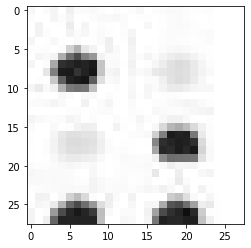

In [45]:
plt.imshow(images_list[1559])

In [43]:
name_list[1559]

25

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(images_list, name_list, test_size=0.2, random_state=42)

In [16]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(units=288, activation="relu"),

    keras.layers.Dense(units=26, activation="softmax") #output layer
])

In [17]:
model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [18]:
from keras.callbacks import EarlyStopping

In [19]:
es1 = EarlyStopping(patience=50, monitor="val_sparse_categorical_accuracy", mode="auto")
es2 = EarlyStopping(patience=50, monitor="val_loss", mode="auto")

history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2])

Epoch 1/100
28/28 [==============================] - 1s 33ms/step - loss: 3.2110 - sparse_categorical_accuracy: 0.1283 - val_loss: 3.2833 - val_sparse_categorical_accuracy: 0.0480
Epoch 2/100
28/28 [==============================] - 1s 27ms/step - loss: 2.0862 - sparse_categorical_accuracy: 0.3780 - val_loss: 4.1487 - val_sparse_categorical_accuracy: 0.0427
Epoch 3/100
28/28 [==============================] - 1s 29ms/step - loss: 1.4628 - sparse_categorical_accuracy: 0.5727 - val_loss: 5.2299 - val_sparse_categorical_accuracy: 0.0427
Epoch 4/100
28/28 [==============================] - 1s 30ms/step - loss: 1.1191 - sparse_categorical_accuracy: 0.6518 - val_loss: 6.5529 - val_sparse_categorical_accuracy: 0.0427
Epoch 5/100
28/28 [==============================] - 1s 29ms/step - loss: 0.9536 - sparse_categorical_accuracy: 0.7148 - val_loss: 7.4586 - val_sparse_categorical_accuracy: 0.0427
Epoch 6/100
28/28 [==============================] - 1s 28ms/step - loss: 0.6992 - sparse_categorica

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 64)         

In [21]:
time = np.arange(1, len(history.history['loss'])+1)

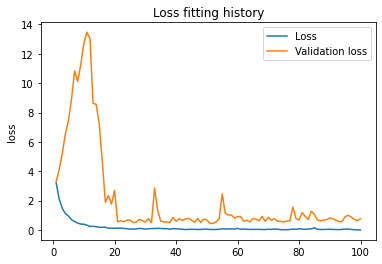

In [22]:
sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])
plt.show()

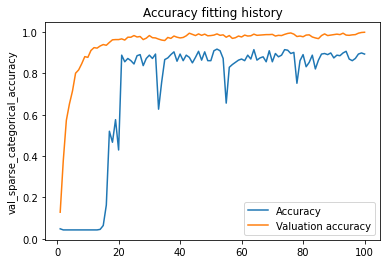

In [23]:
sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])
plt.show()

In [24]:
print("Adam Optimizer")
model.evaluate(X_test, y_test)
model.save("./model1.h5")

Adam Optimizer
10/10 [==============================] - 0s 8ms/step - loss: 0.5758 - sparse_categorical_accuracy: 0.9167


In [25]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(units=288, activation="relu"),
    keras.layers.Dense(units=26, activation="softmax")
])

In [26]:
model.compile(optimizer="RMSprop", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [27]:
from keras.callbacks import EarlyStopping

In [28]:
es1 = EarlyStopping(patience=20, monitor="val_sparse_categorical_accuracy", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

#The neural network will stop fitting if it gets 20 epochs without converge

history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2])

Epoch 1/100
28/28 [==============================] - 2s 32ms/step - loss: 3.0779 - sparse_categorical_accuracy: 0.1535 - val_loss: 3.3698 - val_sparse_categorical_accuracy: 0.0347
Epoch 2/100
28/28 [==============================] - 1s 28ms/step - loss: 1.8751 - sparse_categorical_accuracy: 0.4674 - val_loss: 4.1031 - val_sparse_categorical_accuracy: 0.0427
Epoch 3/100
28/28 [==============================] - 1s 28ms/step - loss: 1.3533 - sparse_categorical_accuracy: 0.5934 - val_loss: 5.0208 - val_sparse_categorical_accuracy: 0.0427
Epoch 4/100
28/28 [==============================] - 1s 30ms/step - loss: 1.0460 - sparse_categorical_accuracy: 0.6919 - val_loss: 6.9249 - val_sparse_categorical_accuracy: 0.0427
Epoch 5/100
28/28 [==============================] - 1s 30ms/step - loss: 0.8181 - sparse_categorical_accuracy: 0.7514 - val_loss: 8.8751 - val_sparse_categorical_accuracy: 0.0427
Epoch 6/100
28/28 [==============================] - 1s 31ms/step - loss: 0.6203 - sparse_categorica

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 7, 7, 64)         

In [30]:
time = np.arange(1, len(history.history['loss'])+1)

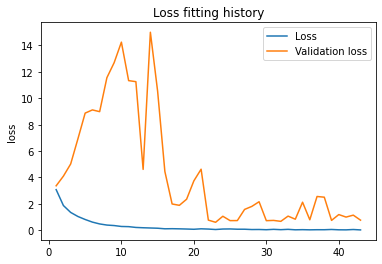

In [31]:
sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])
plt.show()

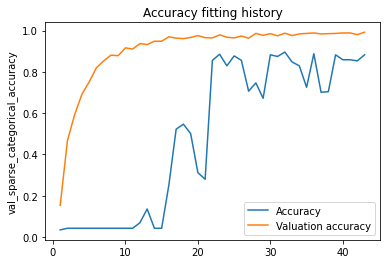

In [32]:
sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])
plt.show()

In [33]:
print("RMSProp")
model.evaluate(X_test, y_test)

RMSProp
10/10 [==============================] - 0s 8ms/step - loss: 0.4296 - sparse_categorical_accuracy: 0.9295


[0.42964357137680054, 0.9294871687889099]

In [34]:
model.save("./model2.h5")